# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('Setup Completed')

Setup Completed


# Import Data:

In [2]:
df = pd.read_csv('topSubscribed.csv')
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


# Data Cleaning:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [4]:
df.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [5]:
df.isnull().any()

Rank               False
Youtube Channel    False
Subscribers        False
Video Views        False
Video Count        False
Category           False
Started            False
dtype: bool

In [6]:
df.duplicated().sum()

0

In [7]:
df['Category'].value_counts()

Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

In [9]:
df = df.replace(',','', regex = True)
df[['Subscribers','Video Views', 'Video Count']] = df[['Subscribers','Video Views', 'Video Count']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [10]:
df = df[df.Category != 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']
df['Category'].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

In [13]:
df.iloc[df['Video Views'].argmax()]

Rank                          1
Youtube Channel        T-Series
Subscribers           234000000
Video Views        212900271553
Video Count               18515
Category                  Music
Started                    2006
Name: 0, dtype: object

# Data Virtualization:

## Distribution by Channels:

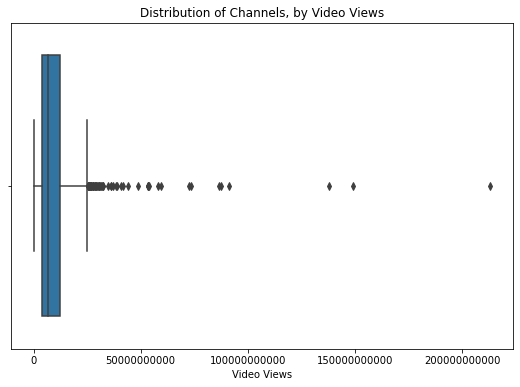

In [15]:
plt.figure(figsize=(9,6))
plt.title("Distribution of Channels, by Video Views")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Video Views'])
plt.show()

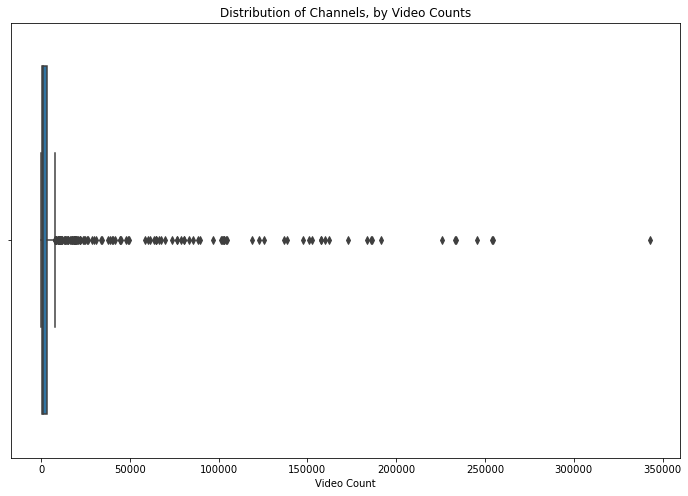

In [17]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Channels, by Video Counts")
sns.boxplot(x=df['Video Count'])
plt.show()

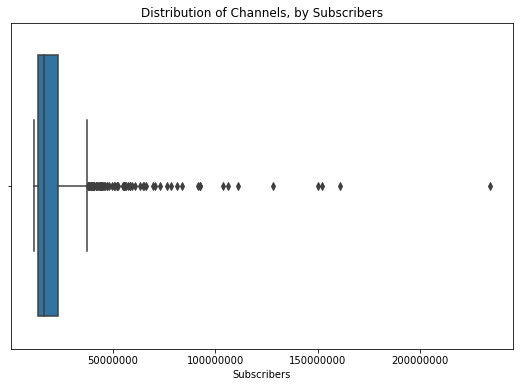

In [18]:
plt.figure(figsize=(9,6))
plt.title("Distribution of Channels, by Subscribers")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Subscribers'])
plt.show()

## Distribution by Categories:

In [19]:
df_byCat = df['Category'].value_counts().to_frame('Count').rename_axis('Category').reset_index()
df_byCat 

,Category,Count
0,Entertainment,238
1,Music,217
2,People & Blogs,132
3,Gaming,94
4,Comedy,68
5,Film & Animation,50
6,Education,45
7,Howto & Style,43
8,News & Politics,27
9,Science & Technology,18


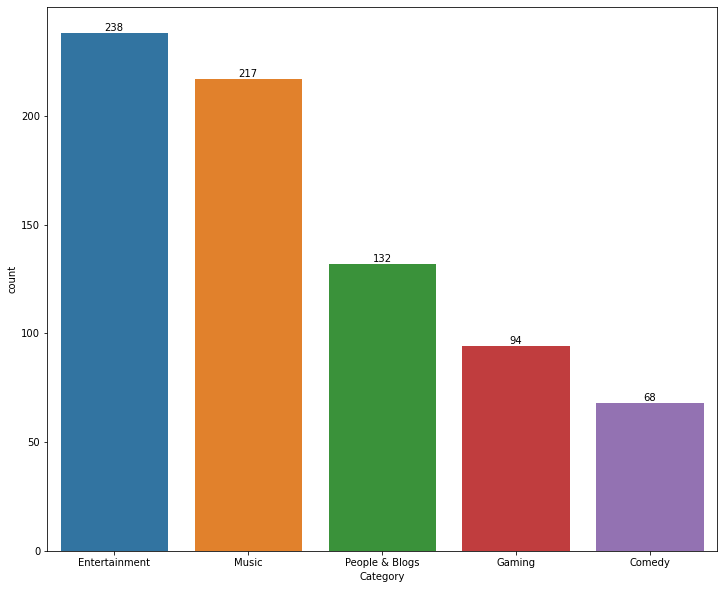

In [24]:
top5 = df["Category"].value_counts().head(5)
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df["Category"], order = top5.index)
ax.bar_label(ax.containers[0])
plt.show()

## Distribution by Started Years:

In [28]:
df_byYear = df['Started'].value_counts().to_frame('Count').rename_axis('Year').reset_index()
df_byYear

,Year,Count
0,2014,120
1,2015,94
2,2011,87
3,2013,81
4,2012,79
5,2016,75
6,2006,69
7,2017,62
8,2009,59
9,2010,45


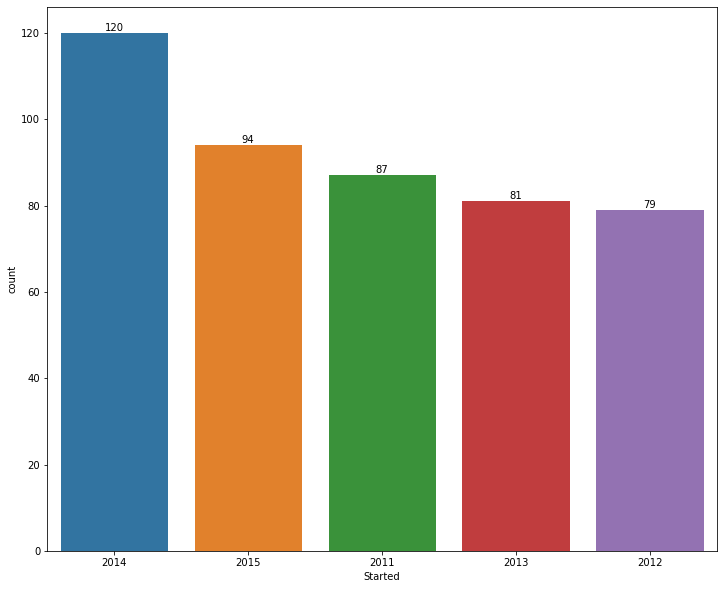

In [30]:
top5y = df['Started'].value_counts().nlargest(5)
plt.figure(figsize=(12,10))
ax = sns.countplot(x = df['Started'], order = top5y.index)
ax.bar_label(ax.containers[0])
plt.show()

# SIUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU !!!